**Recruitment and Retention in Manufacturing Industry**

Develop a machine learning model to forecast employee retention rates based on factors such as compensation, workplace safety, promotion potential, work-life balance, and more. The goal is to identify key drivers of employee retention and provide insights to improve workforce management strategies and reduce attrition

**Features** : Independent Variables

 - Total Compensation
 - Workplace Safety Index
 - Promotion Potential	Culture Score
 - Work Life Balance Ratio
 - Tech Adoption Index
 - Learning Oppurtunities
 - Recognition Frequency
 - Diversity Index %

**Dependent Variable**

 - Retention Rate

**Scales of Values**

- Location: Categorical features like location do not require scaling since they don't have a numerical meaning. They will be one-hot encoded or transformed using techniques like label encoding.

- Salary and Benefits: These features are typically already in monetary values, so they are on a similar scale. No additional scaling might be necessary.

- Workplace Safety: Safety index values could be within a range, say 0 to 100. You might want to normalize these values to a consistent range, such as 0 to 1.

- Career Growth Opportunities: The "Promotion Potential" score could be a value on a certain scale, such as 0 to 10. If the scores are on different scales, you might need to normalize them to a common range.

- Company Culture: The "Culture Score" could be on a scale of 1 to 5 or 1 to 10. If necessary, normalize these values to a consistent scale.

- Work-Life Balance: The work-life balance ratio might already be on a similar scale (0 to 1), so no additional scaling may be required.

- Technological Advancements: The "Tech Adoption Index" might be on a scale of 0 to 100, which is a reasonable scale to use.

- Training and Development: The "Learning Opportunities" metric might be a value like the number of hours of training. Scaling may not be needed if the values are naturally within a reasonable range.

- Employee Recognition: The "Recognition Frequency" could be on a scale like 0 to 10, which represents how frequently an employee is recognized.

- Diversity and Inclusion: The "Diversity Index" could be a percentage value (0 to 100), representing the diversity of the workforce.

**Data Preparation:**

Random Values for all independent variables are generated

In [101]:
import random
import pandas as pd
values = []
for i in range(1000):
    x1 = 'L' + str(i + 1)
    x2 = random.randint(7, 95)
    x3 = random.randint(0, 100)
    x4 = random.randint(0, 10)
    x5 = random.randint(1, 6)
    x6 = random.random()
    x7 = random.randint(0, 100)
    x8 = random.randint(0, 100)
    x9 = random.randint(0, 10)
    x10 = random.randint(0, 100)
    values.append([x1,x2,x3,x4,x5,x6,x7,x8,x9,x10])

df = pd.DataFrame(values,columns=['Location','Total Compensation','Workplace Safety Index','Promotion Potential','Culture Score','Work Life Balance Ratio','Tech Adoption Index','Learning Oppurtunities','Recognition Frequency','Diversity Index'])
df.to_csv('sample1.csv',index=False)
df

,Location,Total Compensation,Workplace Safety Index,Promotion Potential,Culture Score,Work Life Balance Ratio,Tech Adoption Index,Learning Oppurtunities,Recognition Frequency,Diversity Index
0,L1,57,82,4,3,0.501927,35,2,6,97
1,L2,17,14,10,3,0.718038,94,100,0,14
2,L3,54,45,3,2,0.629718,53,78,0,40
3,L4,11,99,4,6,0.445926,98,30,4,76
4,L5,28,85,0,2,0.246876,17,49,8,79
...,...,...,...,...,...,...,...,...,...,...
995,L996,61,54,4,3,0.836970,66,50,9,7
996,L997,18,8,7,1,0.544408,39,31,10,91
997,L998,81,57,6,1,0.348450,40,49,7,38
998,L999,90,64,2,3,0.298061,51,77,2,33


Derieving **Retention Rates**

The method involves creating a composite score for each row based on the independent variables. This score is calculated by summing up the values of the independent variables for each row, dividing it by the sum of the maximum values across all columns, and then multiplying by 100. This process effectively scales the data relative to the maximum possible values and produces a standardized measure that represents the relative contribution of each row to the overall maximum potential. This technique is often referred to as "Normalization" or "Scaling", where the data is transformed to a common scale to ensure fair comparison and uniformity across variables. It helps in ensuring that each variable's influence is proportional and unbiased when creating the composite score.

In [4]:
import pandas as pd
df = pd.read_csv('Random Data.csv')
df

,Location,Total Compensation,Workplace Safety Index,Promotion Potential,Culture Score,Work Life Balance Ratio,Tech Adoption Index,Learning Oppurtunities,Recognition Frequency,Diversity Index %,Retention Rates
0,L1,44.0,36.0,9.0,5.0,0.938646,10.0,1.0,2.0,47.0,29.681771
1,L2,17.0,62.0,7.0,2.0,0.000929,73.0,37.0,10.0,18.0,43.295252
2,L3,54.0,12.0,7.0,3.0,0.735549,26.0,94.0,9.0,91.0,56.845963
3,L4,22.0,38.0,8.0,2.0,0.663248,12.0,12.0,3.0,11.0,20.816741
4,L5,54.0,49.0,3.0,6.0,0.091521,56.0,4.0,2.0,72.0,47.144029
...,...,...,...,...,...,...,...,...,...,...,...
997,L998,44.0,25.0,9.0,5.0,0.591955,49.0,43.0,9.0,83.0,51.262892
998,L999,60.0,98.0,1.0,4.0,0.921173,65.0,48.0,6.0,16.0,57.264665
999,L1000,59.0,10.0,0.0,4.0,0.214538,50.0,85.0,8.0,58.0,52.531587
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Removing non-numerical (categorical or text) columns before applying machine learning models is often necessary as many algorithms require numerical input. Numerical features are compatible with mathematical computations, simplify models, and enhance efficiency. 

In [5]:
df.drop('Location', axis=1, inplace=True)
df

,Total Compensation,Workplace Safety Index,Promotion Potential,Culture Score,Work Life Balance Ratio,Tech Adoption Index,Learning Oppurtunities,Recognition Frequency,Diversity Index %,Retention Rates
0,44.0,36.0,9.0,5.0,0.938646,10.0,1.0,2.0,47.0,29.681771
1,17.0,62.0,7.0,2.0,0.000929,73.0,37.0,10.0,18.0,43.295252
2,54.0,12.0,7.0,3.0,0.735549,26.0,94.0,9.0,91.0,56.845963
3,22.0,38.0,8.0,2.0,0.663248,12.0,12.0,3.0,11.0,20.816741
4,54.0,49.0,3.0,6.0,0.091521,56.0,4.0,2.0,72.0,47.144029
...,...,...,...,...,...,...,...,...,...,...
997,44.0,25.0,9.0,5.0,0.591955,49.0,43.0,9.0,83.0,51.262892
998,60.0,98.0,1.0,4.0,0.921173,65.0,48.0,6.0,16.0,57.264665
999,59.0,10.0,0.0,4.0,0.214538,50.0,85.0,8.0,58.0,52.531587
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Data Cleaning**

dropna() function removes any rows containing missing values, resulting in a DataFrame with only complete data.
Remove the rows used for calculating retention rates.

In [6]:
df.dropna(inplace = True)
df = df[:-1]
df

,Total Compensation,Workplace Safety Index,Promotion Potential,Culture Score,Work Life Balance Ratio,Tech Adoption Index,Learning Oppurtunities,Recognition Frequency,Diversity Index %,Retention Rates
0,44.0,36.0,9.0,5.0,0.938646,10.0,1.0,2.0,47.0,29.681771
1,17.0,62.0,7.0,2.0,0.000929,73.0,37.0,10.0,18.0,43.295252
2,54.0,12.0,7.0,3.0,0.735549,26.0,94.0,9.0,91.0,56.845963
3,22.0,38.0,8.0,2.0,0.663248,12.0,12.0,3.0,11.0,20.816741
4,54.0,49.0,3.0,6.0,0.091521,56.0,4.0,2.0,72.0,47.144029
...,...,...,...,...,...,...,...,...,...,...
995,88.0,88.0,7.0,1.0,0.609460,0.0,28.0,1.0,52.0,50.883103
996,19.0,72.0,6.0,2.0,0.714858,33.0,97.0,10.0,98.0,64.696415
997,44.0,25.0,9.0,5.0,0.591955,49.0,43.0,9.0,83.0,51.262892
998,60.0,98.0,1.0,4.0,0.921173,65.0,48.0,6.0,16.0,57.264665


In [7]:
df.head()

,Total Compensation,Workplace Safety Index,Promotion Potential,Culture Score,Work Life Balance Ratio,Tech Adoption Index,Learning Oppurtunities,Recognition Frequency,Diversity Index %,Retention Rates
0,44.0,36.0,9.0,5.0,0.938646,10.0,1.0,2.0,47.0,29.681771
1,17.0,62.0,7.0,2.0,0.000929,73.0,37.0,10.0,18.0,43.295252
2,54.0,12.0,7.0,3.0,0.735549,26.0,94.0,9.0,91.0,56.845963
3,22.0,38.0,8.0,2.0,0.663248,12.0,12.0,3.0,11.0,20.816741
4,54.0,49.0,3.0,6.0,0.091521,56.0,4.0,2.0,72.0,47.144029


In [8]:
df.describe()

,Total Compensation,Workplace Safety Index,Promotion Potential,Culture Score,Work Life Balance Ratio,Tech Adoption Index,Learning Oppurtunities,Recognition Frequency,Diversity Index %,Retention Rates
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000
mean,50.31900,51.518000,5.157000,3.444000,0.496035,50.44400,49.72700,4.988000,51.082000,51.183022
std,25.72456,29.570257,3.109666,1.672621,0.285386,29.22689,28.00176,3.204391,28.903784,11.896838
min,7.00000,0.000000,0.000000,1.000000,0.000929,0.00000,0.00000,0.000000,0.000000,16.479831
25%,28.00000,26.000000,2.750000,2.000000,0.241082,25.75000,27.00000,2.000000,26.000000,43.164609
50%,50.00000,52.000000,5.000000,3.000000,0.491123,50.00000,49.00000,5.000000,52.000000,50.928250
75%,74.00000,78.000000,8.000000,5.000000,0.733951,76.00000,74.00000,8.000000,75.000000,59.773216
max,95.00000,100.000000,10.000000,6.000000,0.999337,100.00000,100.00000,10.000000,100.000000,86.216419


**Model Selection**

Since we are dealing with a regression task (predicting 'Retention Rates', a continuous variable), using regression algorithms like Linear Regression, Random Forest Regression, Decision Tree Regression, SVR would be more suitable. 

These algorithms are better equipped to handle regression problems and provide predictions in the form of continuous values.

SVM and Naive Bayes are primarily designed for classification tasks, and thus not the most appropriate choice for regression problems.Logistic regression also might not be the best choice, as it's not designed for regression tasks.

So the models we are testing are :

- Linear Regression
- Random Forest Regression
- KNN
- SVR
- Decision Tree Regression

In [9]:
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
X = df.drop(['Retention Rates'], axis=1)
Y = df['Retention Rates']

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

The process of scaling involves subtracting the mean of the feature and then dividing by its standard deviation. This transformation centers the feature values around 0 and scales them to have similar magnitudes.

Feature scaling helps algorithms converge faster during training and prevents features with larger scales from dominating those with smaller scales.

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Linear Regression**

Linear regression is a simple regression model that establishes a linear relationship between the independent variables and the dependent variable. It tries to find the best-fitting straight line that minimizes the sum of squared differences between the actual and predicted values.

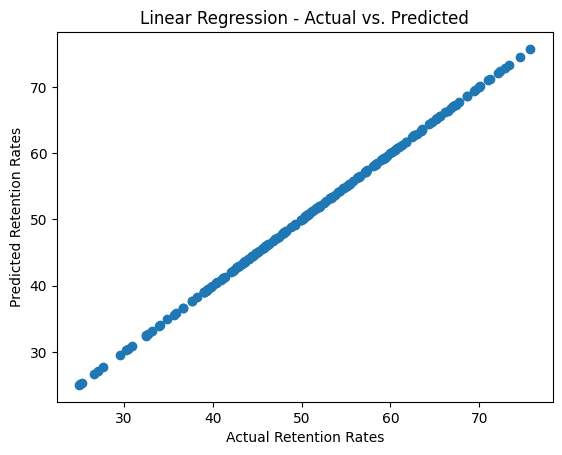

Linear Regression Model - MSE: 7.720462332113504e-18
Linear Regression Model - MAE: 2.360301021298028e-09
Linear Regression Model - RMSE: 2.7785719951287037e-09


In [13]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, Y_train)
y_pred = linear_reg.predict(X_test)

mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
rmse = mean_squared_error(Y_test, y_pred, squared=False)

plt.scatter(Y_test, y_pred)
plt.xlabel("Actual Retention Rates")
plt.ylabel("Predicted Retention Rates")
plt.title("Linear Regression - Actual vs. Predicted")
plt.show()

print("Linear Regression Model - MSE:", mse)
print("Linear Regression Model - MAE:", mae)
print("Linear Regression Model - RMSE:", rmse)

**Support Vector Regression (SVR)**

SVR is a regression technique based on Support Vector Machines. It aims to find a hyperplane that best represents the relationships between the independent variables and the dependent variable. SVR allows for flexibility in shaping the regression line while minimizing prediction errors.

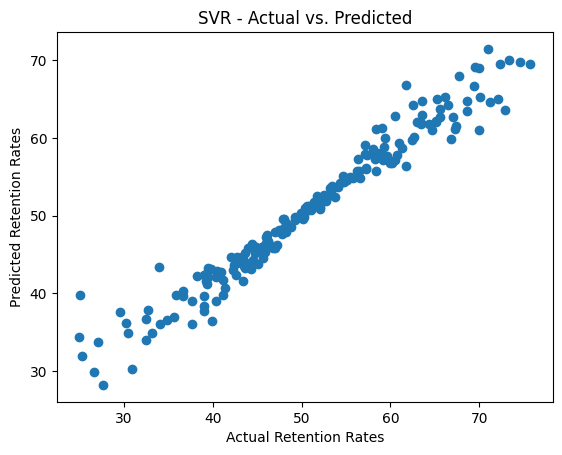

SVR Model - MSE: 8.348653798384682
SVR Model - MAE: 1.9191065985027194
SVR Model - RMSE: 2.8894037098309195


In [14]:
svr = SVR(kernel = 'rbf')
svr.fit(X_train, Y_train)
y_pred = svr.predict(X_test)

mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
rmse = mean_squared_error(Y_test, y_pred, squared=False)

plt.scatter(Y_test, y_pred)
plt.xlabel("Actual Retention Rates")
plt.ylabel("Predicted Retention Rates")
plt.title("SVR - Actual vs. Predicted")
plt.show()

print("SVR Model - MSE:", mse)
print("SVR Model - MAE:", mae)
print("SVR Model - RMSE:", rmse)


**K-Nearest Neighbors Regression(KNN)**

KNN regression is a non-parametric algorithm that predicts the value of a data point by averaging the values of its k-nearest neighbors. It doesn't make any assumptions about the underlying data distribution and is based on the similarity of data points.

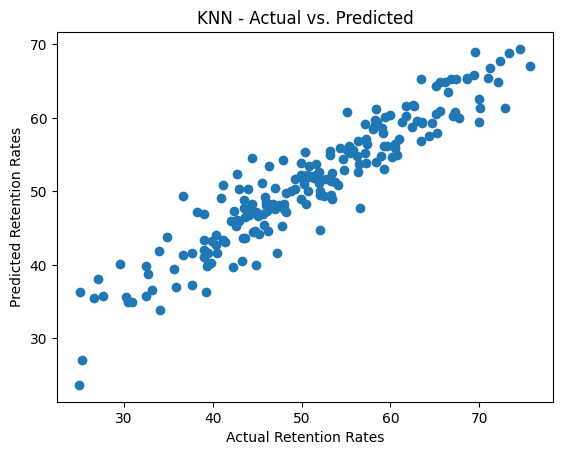

KNN Model - MSE: 19.206076586009605
KNN Model - MAE: 3.379819918520001
KNN Model - RMSE: 4.382473797526872


In [15]:
knn = KNeighborsRegressor()
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)

mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
rmse = mean_squared_error(Y_test, y_pred, squared=False)

plt.scatter(Y_test, y_pred)
plt.xlabel("Actual Retention Rates")
plt.ylabel("Predicted Retention Rates")
plt.title("KNN - Actual vs. Predicted")
plt.show()

print("KNN Model - MSE:", mse)
print("KNN Model - MAE:", mae)
print("KNN Model - RMSE:", rmse)

**Decision Tree Regression**

Decision tree regression is a tree-based model that divides the feature space into regions and makes predictions based on the average value of the target variable within each region. It's a simple model that can capture non-linear relationships in the data but is prone to overfitting if not properly controlled.

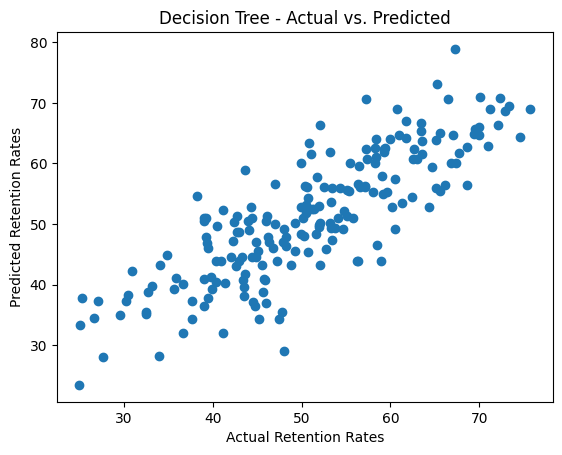

Decision Tree Model - MSE: 41.544418647583754
Decision Tree Model - MAE: 5.14380749705
Decision Tree Model - RMSE: 6.445495997018674


In [16]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, Y_train)
y_pred = decision_tree.predict(X_test)

mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
rmse = mean_squared_error(Y_test, y_pred, squared=False)

plt.scatter(Y_test, y_pred)
plt.xlabel("Actual Retention Rates")
plt.ylabel("Predicted Retention Rates")
plt.title("Decision Tree - Actual vs. Predicted")
plt.show()

print("Decision Tree Model - MSE:", mse)
print("Decision Tree Model - MAE:", mae)
print("Decision Tree Model - RMSE:", rmse)

**Random Forest Regression**

Random Forest Regression is an ensemble technique that combines multiple decision trees to make predictions. Each tree is built on a random subset of the data and contributes to the final prediction. Random Forest can capture complex relationships in the data and reduce overfitting.

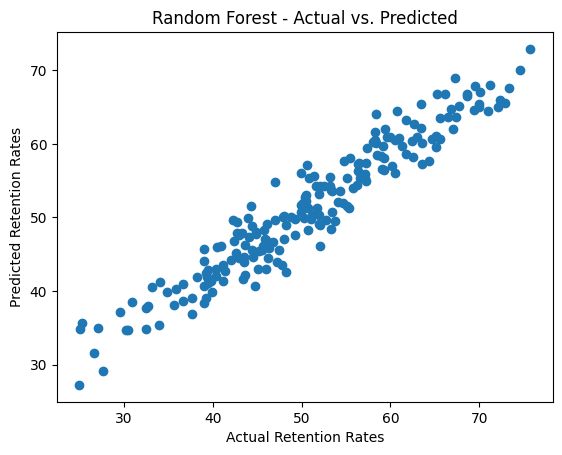

Random Forest Model - MSE: 12.86867431825764
Random Forest Model - MAE: 2.9035010528694993
Random Forest Model - RMSE: 3.587293453044738


In [17]:
random_forest = RandomForestRegressor()
random_forest.fit(X_train, Y_train)
y_pred = random_forest.predict(X_test)

mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
rmse = mean_squared_error(Y_test, y_pred, squared=False)

plt.scatter(Y_test, y_pred)
plt.xlabel("Actual Retention Rates")
plt.ylabel("Predicted Retention Rates")
plt.title("Random Forest - Actual vs. Predicted")
plt.show()

print("Random Forest Model - MSE:", mse)
print("Random Forest Model - MAE:", mae)
print("Random Forest Model - RMSE:", rmse)

**Evaluation Metrics**

Evaluation metrics are essential tools in machine learning and data analysis that help you quantify the performance of your models. They provide objective measures of how well your model's predictions align with the actual outcomes.

- After evaluating several regression models to address the recruitment and retention challenges in the manufacturing industry, Linear Regression emerged as the optimal choice. 
- It has remarkably low Evaluation metrics like Mean Squared Error (MSE), Mean Absolute Error (MAE), Root Mean Squared Error (RMSE) compared to alternative models underscores its ability to accurately predict retention rates. 

**Model Selection** 

Thus the Linear Regression Model is selected

**Results and Insights**

The results of the Linear Regression model are discussed and visualized in the Jupyter Notebook provided in the repository. The notebook provides insights into the relationships between various factors and employee retention rates.

**Conclusion**

The Recruitment and Retention Prediction model developed in this project offers valuable insights for manufacturing companies to enhance their workforce management strategies and reduce attrition. By understanding the factors influencing retention, companies can implement targeted initiatives to create a positive work environment and retain valuable employees.